In [1]:
import pandas as pd
import gzip
import re
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pickle
from matplotlib.colors import LinearSegmentedColormap # for creating a custom color pallate
from tqdm.autonotebook import tqdm
from Bio import Phylo
import matplotlib.backends.backend_pdf as pdf_backend
import sys
import scipy.sparse as sp
import scipy.io as io

/tmp/ipykernel_3857/530770684.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Fig. 1

## Fig. 1c

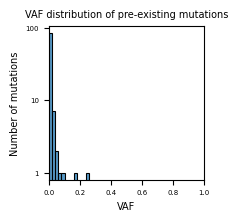

In [54]:
sim_id = "673771"
mode = "linear_bn"
main_dir = "/syn1/wangxin/work/GB_rev/simul/1209/res/"

fn = f"{main_dir}{mode}/{sim_id}/mt_allmuts_mid_100_500_5e-08_{sim_id}.pkl"
with open(fn, "rb") as tmp:
    data = pickle.load(tmp)
    initial_mut_ser = (pd.Series([j for i in data["<0_0>"] if len(i)>0 for j in i]).value_counts())/500

plt.figure(figsize=(2, 2))
sns.histplot(initial_mut_ser, binwidth = 0.02 )
plt.xlim(0,1)
plt.yscale("log")
plt.yticks([1, 10, 100], [1, 10, 100])
plt.gca().yaxis.set_minor_locator(plt.NullLocator())
plt.xlabel("VAF")
plt.ylabel("Number of mutations")
plt.title("VAF distribution of pre-existing mutations", size = 7)
plt.savefig(f"/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/fig1/vaf_dist_0_1.pdf", bbox_inches='tight', pad_inches=0.1)

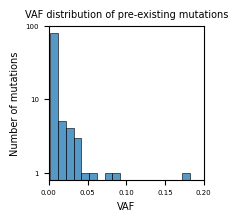

In [60]:
plt.figure(figsize=(2, 2))
sns.histplot(initial_mut_ser, binwidth = 0.01 )
plt.xlim(0,0.2)
plt.yscale("log")
plt.yticks([1, 10, 100], [1, 10, 100])
plt.gca().yaxis.set_minor_locator(plt.NullLocator())
plt.xlabel("VAF")
plt.ylabel("Number of mutations")
plt.title("VAF distribution of pre-existing mutations", size = 7)
plt.savefig(f"/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/fig1/vaf_dist_0.2.pdf", bbox_inches='tight', pad_inches=0.1)

## Fig. 1d

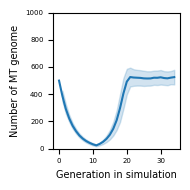

In [62]:
sim_id = "12170"
mode = "linear_bn"
main_dir = "/syn1/wangxin/work/GB_rev/simul/1209/res/"

fn = f"{main_dir}{mode}/{sim_id}/mt_allmuts_mid_100_500_5e-08_{sim_id}.pkl"
with open(fn, "rb") as tmp:
    data = pickle.load(tmp)
    initial_mut_ser = (pd.Series([j for i in data["<0_0>"] if len(i)>0 for j in i]).value_counts())/500

mt_num_dict = {}
mt_num_ls = []
gen_ls = []
for i in data:
    Gen = int(i.split("_")[0][1:])
    if Gen < 35:
        gen_ls.append(Gen)
        mt_num_ls.append(len(data[i]))
    
        try:
            mt_num_dict[Gen].append(len(data[i]))
        except:
            mt_num_dict[Gen] = [len(data[i])]

mt_num_per_cell_ser = pd.Series(mt_num_ls, index = gen_ls)
mt_num_over_gen = pd.Series([pd.Series(mt_num_dict[i]).mean() for i in mt_num_dict], index = mt_num_dict.keys())


# Create a dataframe to hold the data for seaborn
df = pd.DataFrame({
    "Generation": gen_ls,
    "MT_Count": mt_num_ls,
    "Model": "Bottleneck"
})

plt.figure(figsize=(2, 2))
sns.lineplot(data=df, x="Generation", y="MT_Count", errorbar="sd", linewidth=1.5)  # ci="sd" gives standard deviation as confidence interval
plt.xlabel("Generation in simulation")
plt.ylabel("Number of MT genome")
plt.ylim(0, 1000)
plt.tight_layout()


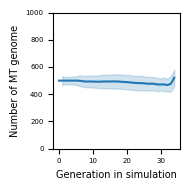

In [61]:
sim_id = "784234"
mode = "linear_const"
main_dir = "/syn1/wangxin/work/GB_rev/simul/1209/res/"

fn = f"{main_dir}{mode}/{sim_id}/mt_allmuts_const_100_500_5e-08_{sim_id}.pkl"
with open(fn, "rb") as tmp:
    data = pickle.load(tmp)
    initial_mut_ser = (pd.Series([j for i in data["<0_0>"] if len(i)>0 for j in i]).value_counts())/500

mt_num_dict = {}
mt_num_ls = []
gen_ls = []
for i in data:
    Gen = int(i.split("_")[0][1:])
    if Gen < 35:
        gen_ls.append(Gen)
        mt_num_ls.append(len(data[i]))
    
        try:
            mt_num_dict[Gen].append(len(data[i]))
        except:
            mt_num_dict[Gen] = [len(data[i])]

mt_num_per_cell_ser = pd.Series(mt_num_ls, index = gen_ls)
mt_num_over_gen = pd.Series([pd.Series(mt_num_dict[i]).mean() for i in mt_num_dict], index = mt_num_dict.keys())


# Create a dataframe to hold the data for seaborn
df1 = pd.DataFrame({
    "Generation": gen_ls,
    "MT_Count": mt_num_ls,
    "Model": "Constant"
})

plt.figure(figsize=(2, 2))
sns.lineplot(data=df1, x="Generation", y="MT_Count", errorbar="sd", linewidth=1.5)  # ci="sd" gives standard deviation as confidence interval
plt.xlabel("Generation in simulation")
plt.ylabel("Number of MT genome")
plt.ylim(0, 1000)
plt.tight_layout()

In [63]:
df2 = pd.concat([df, df1], axis = 0)

/tmp/ipykernel_3857/2704768789.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.lineplot(data=df2, x="Generation", y="MT_Count", hue="Model", errorbar="sd", palette=sns.color_palette("Set2"), linewidth=1.5)  # ci="sd" gives standard deviation as confidence interval


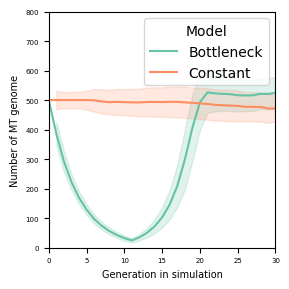

In [65]:
sns.color_palette("Set2")
plt.figure(figsize=(3, 3))
sns.lineplot(data=df2, x="Generation", y="MT_Count", hue="Model", errorbar="sd", palette=sns.color_palette("Set2"), linewidth=1.5)  # ci="sd" gives standard deviation as confidence interval
plt.xlabel("Generation in simulation")
plt.ylabel("Number of MT genome")
plt.ylim(0, 800)
plt.xlim(0, 30)

plt.tight_layout()
plt.savefig(f"/syn1/wangxin/work/GB_rev/simul/1209/fig_plots/fig1/MT_number_over_generation.pdf", bbox_inches='tight', pad_inches=0.1)